In [241]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [245]:
def Sunspot_number_read_and_parsing():
    fin = open("Daily_total_sunspot_number.txt", "r")

    data = fin.readlines()

    dates = []
    count = []

    last = pd.Series(pd.date_range('1800-01-01', periods=1, freq='D'))
    cur = pd.Series(pd.date_range('1800-01-01', periods=1, freq='D'))
    tmp = pd.Series([pd.Timedelta(days=i+1) for i in range(1)])
    
    for line in data:
        date = line[0:4] + '-' + line[5:7] + '-' + line[8:10]
        if date[5] == ' ':
            date = date[:5] + '0' + date[6:]

        cur = pd.Series(pd.date_range(date, periods=1, freq='D'))
        if (len(dates) != 0):
            while (last != cur):
                my_date = pd.Series.to_string(last)
                dates.append()
                cout.append(-1)


        dates.append(line[0:4] + '-' + line[5:7] + '-' + line[8:10])
        if dates[len(dates) - 1][5] == ' ':
            dates[len(dates) - 1] = dates[len(dates) - 1][:5] + '0' + dates[len(dates) - 1][6:]
        dates.append(date)
        count.append(int(line[21:24]))

    return (dates, count)

In [246]:
def Daily_sunspot_number_plot():
    (dates, count) = Sunspot_number_read_and_parsing()

    df_daily = pd.DataFrame({'count': pd.Series(count, index=pd.DatetimeIndex(dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_daily.plot()
    plt.show()

In [247]:
Daily_sunspot_number_plot()

TypeError: ufunc add cannot use operands with types dtype('<U10') and dtype('<m8[ns]')

In [231]:
def Period_sunspot_number_plot(period):
    (dates, count) = Sunspot_number_read_and_parsing()

    without_monitoring = []

    for i in range(len(count)):
        if (count[i] == -1):
            add = 1
        else:
            add = 0
        without_monitoring.append(add)

    period_count = []
    period_dates = []

    for i in range(len(count) - period + 1):
        if (sum(without_monitoring[i:i+period]) != period):
            nom_sum = sum(count[i:i+period]) + sum(without_monitoring[i:i+period])
            real_sum = math.floor(nom_sum * period / (period - sum(without_monitoring[i:i+period])))
            period_count.append(real_sum)
            period_dates.append(dates[period // 2 + i])

    df_period = pd.DataFrame({'Period: ' + str(period): pd.Series(period_count, index=pd.DatetimeIndex(period_dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_period.plot()
    plt.show()

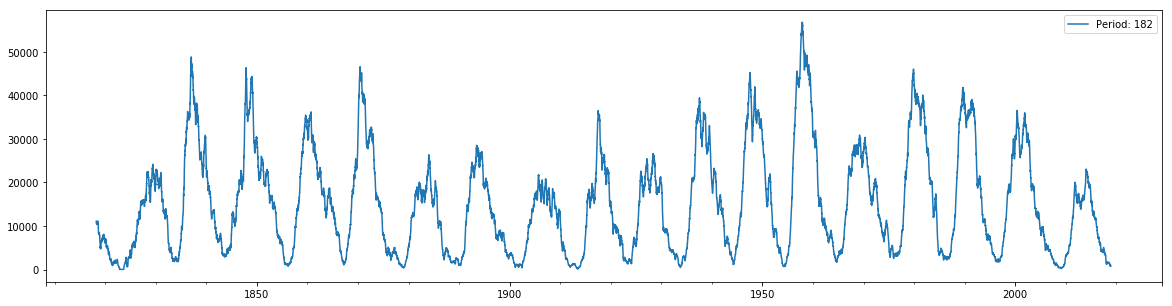

In [191]:
Period_sunspot_number_plot(182)

In [192]:
def Sunspot_area_read():
    fin = open("rgofull.txt", "r")

    data = fin.readlines()

    dates = []
    area = []

    for line in data:
        dates.append(line[0:4] + '-' + line[4:6] + '-' + line[6:8])
        if dates[len(dates) - 1][5] == ' ':
            dates[len(dates) - 1] = dates[len(dates) - 1][:5] + '0' + dates[len(dates) - 1][6:]
        if dates[len(dates) - 1][8] == ' ':
            dates[len(dates) - 1] = dates[len(dates) - 1][:8] + '0' + dates[len(dates) - 1][9:]
        area.append(int(line[40:44]))

    fin = open("rgousfull.txt", "r")

    for line in data:
        dates.append(line[0:4] + '-' + line[4:6] + '-' + line[6:8])
        if dates[len(dates) - 1][5] == ' ':
            dates[len(dates) - 1] = dates[len(dates) - 1][:5] + '0' + dates[len(dates) - 1][6:]
        if dates[len(dates) - 1][8] == ' ':
            dates[len(dates) - 1] = dates[len(dates) - 1][:8] + '0' + dates[len(dates) - 1][9:]
        area.append(int(line[40:44]))

    return (dates, area)

In [196]:
def Sunspot_area_parsing(dates, area):
    res_dates = []
    res_area = []

    for i in range(len(dates)):
        if (i == 0):
            res_dates.append(dates[0])
            res_area.append(area[0])
        else:
            if (dates[i] == dates[i - 1]):
                res_area[len(res_area) - 1] += area[i]
            else:
                res_dates.append(dates[i])
                res_area.append(area[i])

    return (res_dates, res_area)

In [197]:
(dates, area) = Sunspot_area_read()
(dates, area) = Sunspot_area_parsing(dates, area)
print(dates)

['1874-05-01', '1874-05-02', '1874-05-03', '1874-05-04', '1874-05-05', '1874-05-06', '1874-05-07', '1874-05-08', '1874-05-09', '1874-05-10', '1874-05-11', '1874-05-12', '1874-05-13', '1874-05-14', '1874-05-15', '1874-05-16', '1874-05-17', '1874-05-18', '1874-05-19', '1874-05-20', '1874-05-21', '1874-05-22', '1874-05-23', '1874-05-24', '1874-05-25', '1874-05-26', '1874-05-27', '1874-05-28', '1874-05-29', '1874-05-30', '1874-05-31', '1874-06-01', '1874-06-02', '1874-06-03', '1874-06-04', '1874-06-05', '1874-06-06', '1874-06-07', '1874-06-08', '1874-06-09', '1874-06-10', '1874-06-11', '1874-06-12', '1874-06-13', '1874-06-14', '1874-06-15', '1874-06-16', '1874-06-17', '1874-06-18', '1874-06-19', '1874-06-20', '1874-06-21', '1874-06-22', '1874-06-23', '1874-06-24', '1874-06-25', '1874-06-26', '1874-06-27', '1874-06-28', '1874-06-29', '1874-06-30', '1874-07-01', '1874-07-02', '1874-07-03', '1874-07-04', '1874-07-05', '1874-07-06', '1874-07-07', '1874-07-08', '1874-07-09', '1874-07-10', '1874

In [202]:
import datetime

df = ['1998-12-25']
df = pd.to_datetime(df)
temp = df.apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
df_new = df + temp
print(df)

AttributeError: 'DatetimeIndex' object has no attribute 'apply'

In [277]:
str = '1800-12-25'
s = pd.Series(pd.date_range(str, periods=1, freq='D'))
td = pd.Series([pd.Timedelta(days=i+1) for i in range(1)])


In [283]:
print(s[0])
s = s + td
kek = pd.Series.to_string(s).split()
print(kek)

1800-12-30 00:00:00
['0', '1800-12-31']
